## Simple Linear Regression


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


<AxesSubplot:>

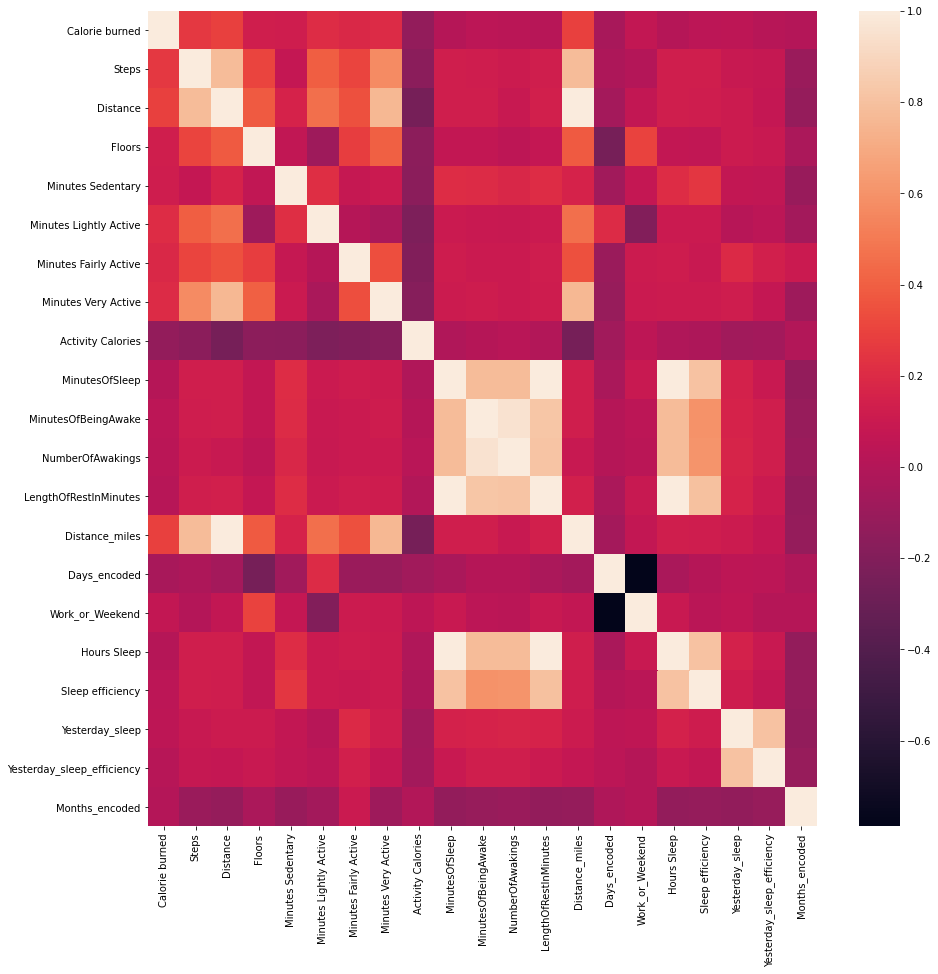

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

### Simple Regression Plot

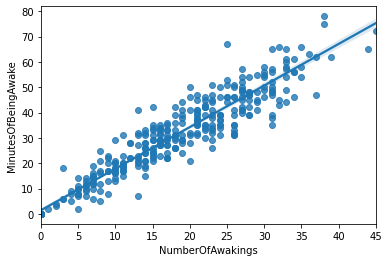

In [6]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)
plt.show()

[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

### Estimating OLS using statsmodels

In [7]:
import statsmodels.api as sm
Y = data['MinutesOfBeingAwake']
X = data['NumberOfAwakings']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Thu, 12 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         16:31:17   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Binary X-Variables

#### Using 'Work_or_Weekend' as an explanatory variable

In [8]:
data['Work_or_Weekend'].value_counts()

1    262
0    105
Name: Work_or_Weekend, dtype: int64

In [9]:
pd.pivot_table(data, index = ['Work_or_Weekend'], values='MinutesOfBeingAwake')

,MinutesOfBeingAwake
Work_or_Weekend,
0,26.895238
1,28.454198


In [10]:
Y = data['MinutesOfBeingAwake']
X = data['Work_or_Weekend']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.5292
Date:                 Thu, 12 Nov 2020   Prob (F-statistic):              0.467
Time:                         16:31:51   Log-Likelihood:                -1591.6
No. Observations:                  367   AIC:                             3187.
Df Residuals:                      365   BIC:                             3195.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.8952      1.811     14.854      0.000      23.335      30.456
Work_or_Weekend     1.5590      2.143      0.727      0.467      -2.655       5.773
==============================================================================
Omnibus:                       24.581   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.338
Skew:                           0.058   Prob(JB):                      0.00938
Kurtosis:                       2.227   Cond. No.                         3.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# in above regression, the confidence interval contain zero '0', 
# therefore we can not say for sure that work or weekend has an impact aport from zero

#### Using an indicator for whether sleep was efficient (above 90) as an explanatory variable


In [11]:
X = pd.DataFrame()
X['EfficientSleep'] = np.where(data['Sleep efficiency']>90, 1, 0)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
# we define: efficient sleep as a new variable in dataframe
# that takes value of 1 if above 90 in sleep efficiency, 0 otherwise. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.029
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     10.72
Date:                 Thu, 12 Nov 2020   Prob (F-statistic):            0.00116
Time:                         16:32:36   Log-Likelihood:                -1586.6
No. Observations:                  367   AIC:                             3177.
Df Residuals:                      365   BIC:                             3185.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.9137      1.304     23.710      0.000      28.350      33.478
EfficientSleep    -6.2725      1.916     -3.274      0.001     -10.040      -2.505
==============================================================================
Omnibus:                       17.383   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.279
Skew:                          -0.251   Prob(JB):                      0.00586
Kurtosis:                       2.351   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categorical X-Variables

#### Using 'Days' (categorical) as an explanatory variable


In [24]:
data['Days'].value_counts()

Friday       54
Saturday     53
Tuesday      52
Thursday     52
Wednesday    52
Sunday       52
Monday       52
Name: Days, dtype: int64

In [12]:
X = pd.get_dummies(data['Days'], drop_first = True)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
#  we therefore define a dummy variable
# drop_first drops the first variable, which we use as baseline --> this is to avoide correlation and multicolinearity.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.8900
Date:                 Thu, 12 Nov 2020   Prob (F-statistic):              0.502
Time:                         16:33:20   Log-Likelihood:                -1589.2
No. Observations:                  367   AIC:                             3192.
Df Residuals:                      360   BIC:                             3220.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0370      2.525     11.102      0.000      23.071      33.004
Monday        -2.4793      3.606     -0.688      0.492      -9.570       4.612
Saturday      -1.3767      3.588     -0.384      0.701      -8.433       5.680
Sunday        -0.9024      3.606     -0.250      0.803      -7.993       6.188
Thursday       4.9630      3.606      1.376      0.170      -2.128      12.054
Tuesday       -1.1332      3.606     -0.314      0.753      -8.224       5.958
Wednesday      0.7514      3.606      0.208      0.835      -6.339       7.842
==============================================================================
Omnibus:                       25.696   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.589
Skew:                           0.062   Prob(JB):                      0.00827
Kurtosis:                       2.218   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimating OLS parameters using scipy.stats

In [13]:
from scipy.stats import linregress
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [14]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err  = linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202


#### Predictions

In [16]:
predictions = [intercept + slope*x for x in X]
print(predictions)

[39.16992865563785, 35.888900368397884, 42.4509569428778, 35.888900368397884, 73.62072567165741, 52.294041804597676, 21.12427307581807, 27.68632965029799, 30.967357937537948, 19.483758932198093, 14.562216501338154, 45.73198523011776, 37.529414512017865, 44.09147108649778, 44.09147108649778, 40.81044279925782, 32.60787208115792, 1.4381033523783202, 47.37249937373774, 29.326843793917966, 53.93455594821766, 44.09147108649778, 42.4509569428778, 55.57507009183764, 44.09147108649778, 57.21558423545761, 49.01301351735772, 26.04581550667801, 57.21558423545761, 45.73198523011776, 32.60787208115792, 50.6535276609777, 42.4509569428778, 24.40530136305803, 50.6535276609777, 6.359645783238258, 35.888900368397884, 24.40530136305803, 24.40530136305803, 29.326843793917966, 22.764787219438052, 19.483758932198093, 1.4381033523783202, 16.202730644958134, 50.6535276609777, 39.16992865563785, 44.09147108649778, 37.529414512017865, 49.01301351735772, 40.81044279925782, 47.37249937373774, 26.04581550667801, 2

#### Calculating residuals

In [18]:
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

## Using sklearn

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
help(linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [20]:
X = X.values.reshape(-1, 1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

0.9059552749155962

In [21]:
print(lm.intercept_)
print(lm.coef_)
predictions = lm.predict(X)
print(r2_score(Y, predictions))
print(mean_squared_error(Y, predictions))


1.4381033523782953
[1.64051414]
0.9059552749155962
32.24298427103866


## Logistic Regression

In [22]:
Y = pd.DataFrame(np.where(data['Sleep efficiency']>90, 1, 0))
X = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.676012
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      0   No. Observations:                  367
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                 0.02089
Time:                        16:35:42   Log-Likelihood:                -248.10
converged:                       True   LL-Null:                       -253.39
Covariance Type:            nonrobust   LLR p-value:                  0.001138
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3719      0.193      1.930      0.054      -0.006       0.750
MinutesOfBeingAwake    -0.0187      0.006     -3.202      0.001      -0.030      -0.007
=======================================================================================
"""

In [23]:
results.predict(X)
# probability of Y being 1, given x value of the column

0      0.471448
1      0.429803
2      0.380273
3      0.448225
4      0.300747
         ...   
362    0.438993
363    0.494796
364    0.429803
365    0.398055
366    0.333117
Length: 367, dtype: float64

In [ ]:
# for logistic regression, we just look at direction of impact and on significance
# also we predict p

In [28]:
# Calculate impact of a given value X on Y
results.predict((1,35))[0]
# 1 for the contant and 35 for the x value

0.4298025325524101